# Libraries for our Model

In [15]:
import matplotlib.pylab as plt
from scipy.special import erf
import pandas as pd
import numpy as np 

# Importing COVID 19 Data

In [2]:
!git clone https://github.com/CSSEGISandData/COVID-19.git
confirmed = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
time = confirmed.columns[4:]
print(confirmed.columns[4:])

Cloning into 'COVID-19'...
remote: Enumerating objects: 50404, done.
remote: Total 50404 (delta 0), reused 0 (delta 0), pack-reused 50404
Receiving objects: 100% (50404/50404), 398.21 MiB | 31.51 MiB/s, done.
Resolving deltas: 100% (31558/31558), done.
Checking out files: 100% (606/606), done.
Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/28/20', '8/29/20', '8/30/20', '8/31/20', '9/1/20', '9/2/20',
       '9/3/20', '9/4/20', '9/5/20', '9/6/20'],
      dtype='object', length=229)


# Preprocessing

In [3]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11284,11548,11837,12160,12297,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184,15491,15834,16153,16534,16844,17306,17606,17989,18313,18476,18802,19213,19678,20155,20677,21251,21668,22204,22729,23281,23875,24471,25142,25575,26127
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1711,1726,1728,1730,1734,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841,1847,1858,1858,1869,1882,1889,1892,1899,1906,1907,1911,1916,1924,1930,1933,1943,1946,1953,1958,1962,1976,1979,1983,1983,1987
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5249,5555,5963,6228,6347,6580,6793,7022,7164,7486,7903,8085,8210,8275,8501,8663,9021,9186,9343,9839,9981,10218,10372,10627,10831,11082,11148,11285,11376,11601,11779,11902,12025,12097,12381,12415,12523,12639,12709,12776


In [20]:
confirmed[confirmed['Country/Region']=='China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
56,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
57,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,933,933,933,933,933,933,934,934,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935
58,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,584
59,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,366,366,366,367,367,367,367,367,367,367,367,367,367,368,368,368,368,369,370,370,370,370,370,371,372,375,375,375,375,376,378,380,382,383,383,383,384,385,386,386
60,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,167,167,167,167,167,167,167,167,167,167,167,167,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,170,170
61,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,1675,1678,1680,1682,1683,1687,1687,1687,1687,1688,1693,1696,1699,1699,1707,1707,1709,1712,1720,1721,1725,1725,1725,1725,1727,1727,1730,1734,1734,1735,1737,1738,1739,1740,1742,1745,1758,1760,1763,1767
62,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,257,257,257,257
63,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
64,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
65,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,349,349,349,349,349,349,349,349,349,349,349,349,350,350,351,351,351,351,351,351,351,351,351,354,359,359,360,360,362,362,362,362,362,365,365,365,365,365,365,365


In [21]:
confirmed[confirmed['Country/Region']=='China'].groupby('Country/Region').sum().iloc[:,2:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,...,87213,87489,87655,87827,87985,88099,88206,88328,88460,88580,88672,88793,88906,88958,89045,89144,89214,89279,89375,89441,89494,89527,89567,89616,89654,89695,89718,89752,89784,89814,89836,89863,89895,89914,89933,89953,89986,90008,90025,90058


# Data Extraction for China

In [22]:
def get_timeseries(country):
  dic = {}
  dic['confirmed'] = confirmed[confirmed['Country/Region']==country].groupby('Country/Region').sum().iloc[:,2:].values
  dic['deaths'] = deaths[deaths['Country/Region']==country].groupby('Country/Region').sum().iloc[:,2:].values
  dic['recovered'] = recovered[recovered['Country/Region']==country].groupby('Country/Region').sum().iloc[:,2:].values
  dic['active'] = dic['confirmed']-dic['recovered']-dic['deaths']
  return dic

get_timeseries('China')

{'active': array([[  503,   595,   858,  1325,  1970,  2737,  5277,  5834,  7835,
          9375, 11357, 15806, 18677, 22373, 25762, 28477, 31393, 33413,
         35705, 37424, 38638, 38560, 52309, 56860, 57452, 57992, 58108,
         58002, 56541, 54825, 54608, 51859, 51390, 49631, 47413, 45365,
         42924, 39809, 37199, 34898, 32368, 29864, 27402, 25230, 23702,
         22159, 20335, 18933, 17567, 16116, 14859, 13569, 12124, 10783,
          9906,  9030,  8106,  7372,  6731,  6189,  5799,  5410,  5030,
          4603,  4310,  3881,  3600,  3236,  2967,  2764,  2640,  2545,
          2425,  2267,  2062,  2020,  1973,  1905,  1865,  1810,  1794,
          1835,  1829,  1761,  1699,  1656,  1572,  1537,  1479,  1436,
          1418,  1371,  1265,  1154,  1098,   998,   907,   881,   833,
           796,   749,   736,   643,   537,   461,   404,   361,   346,
           226,   206,   176,   159,   141,   131,   120,   113,   110,
           115,   115,   115,   115,   111,   111,   1

In [23]:
from datetime import datetime
@np.vectorize
def convert_to_datetime(tt): return datetime.strptime(tt, '%m/%d/%y')
time_dt = convert_to_datetime(time)

# Data Visualization

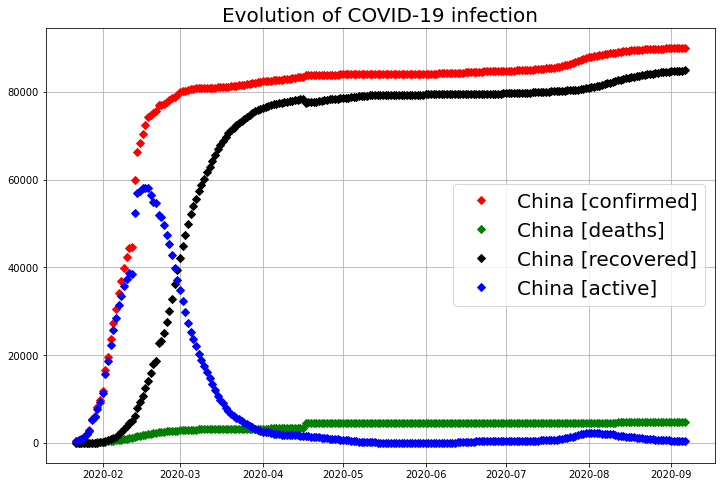

In [24]:
def plot_country(country, lstyle = '-', marker = '*', ):
  dic = get_timeseries(country)
  fig = plt.figure(figsize = (12,8))
  plt.title('Evolution of COVID-19 infection', fontsize=20, loc='center')
  plt.plot_date(time_dt, dic['confirmed'][0], c = 'r', label = country+' [confirmed]', linestyle = lstyle, marker = marker)
  plt.plot_date(time_dt, dic['deaths'][0], c = 'g', label = country+' [deaths]', linestyle = lstyle, marker = marker)
  plt.plot_date(time_dt, dic['recovered'][0], c = 'k', label = country+' [recovered]', linestyle = lstyle, marker = marker)
  plt.plot_date(time_dt, dic['active'][0], c = 'b', label = country+' [active]', linestyle = lstyle, marker = marker)
  plt.legend(fontsize = 20)
  plt.grid(True)
  plt.show(fig)

plot_country('China', 'None', 'D')

# SIRD Model Adjustment

In [25]:
def rk4vec(t0, y0, dt, f):
    k1 = f(t0, y0)
    k2 = f(t0 + dt/2.0, y0 + dt * k1 / 2.0)
    k3 = f(t0 + dt/2.0, y0 + dt * k2 / 2.0)
    k4 = f(t0 + dt, y0 + dt * k3)
    y = y0 + (dt/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return y

class SIRD_model():

  def __init__(self, init_condition, tmin = 0., tmax = 50., n = 10000, **params):
    self.tmin = tmin
    self.tmax = tmax
    self.n = n
    self.t = np.linspace(self.tmin, self.tmax, self.n)
    self.dt = self.t[1] - self.t[0]
    self.S = np.zeros([self.n])
    self.I = np.zeros([self.n])
    self.R = np.zeros([self.n])
    self.D = np.zeros([self.n])
    self.set_params(**params)
    self.init_condition = init_condition 

  def set_params(self, beta, miu, delta, max_population):
    # Model Parameters definition
    self.beta = beta
    self.miu =  miu
    self.delta = delta
    self.max_population = max_population

  def func(self, t, u):
    #ODEs System
    self.uprime = np.zeros_like(u)
    self.uprime[0] = -self.beta*u[0]*u[1]/self.max_population
    self.uprime[1] = self.beta*u[0]*u[1]/self.max_population-self.miu*u[1]
    self.uprime[2] = self.miu*u[1]
    self.uprime[3] = self.delta*u[1]
    return self.uprime

  def run_solver(self):
      # RK4 Solution
      self.u0 = np.array(self.init_condition)
      self.u1 = np.zeros_like(self.u0)
      for i in range(self.n):
        self.S[i] = self.u0[0]
        self.I[i] = self.u0[1]
        self.R[i] = self.u0[2]
        self.D[i] = self.u0[3]
        self.u1 = rk4vec(self.t[i], self.u0, self.dt, self.func)
        self.u0 = np.copy(self.u1)

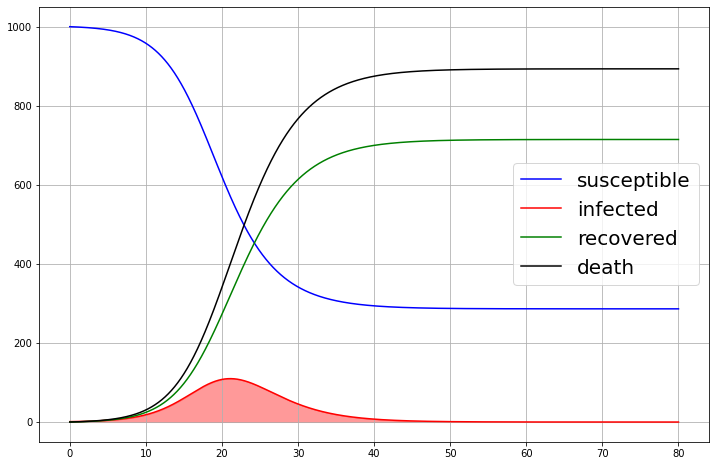

In [27]:
max_population = 1000
params = {'beta': 0.7, 'miu': 0.4, 'delta': 0.5, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0]
model = SIRD_model(init_condition=init_condition, tmax=80, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(12,8))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'death', color = 'k')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

# SIRD Model Adjustment | Hong Kiong



In [32]:
confirmed[confirmed['Country/Region']=='Hong Kong']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20


# SIRD MODEL Adjustment | Mexico

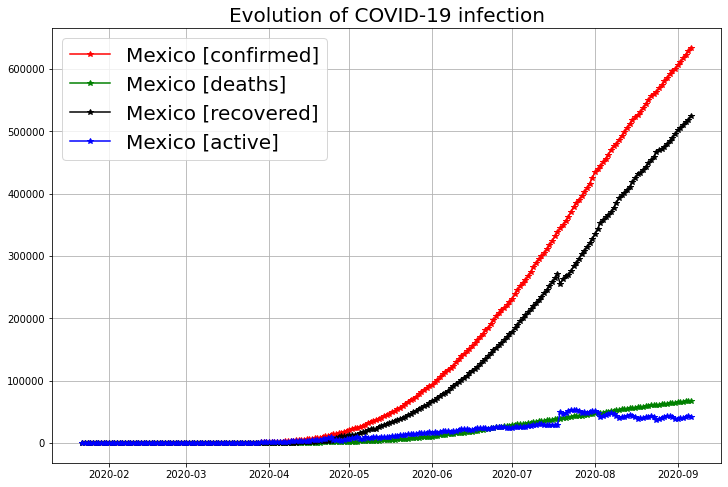

In [28]:

plot_country('Mexico')